# Upper Confidence Bound (UCB)

### Libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('C:/Users/Acer/Desktop/PythonNotes/Python/DataSetsPython/Ads_CTR_Optimisation.csv')


### Implementing UCB

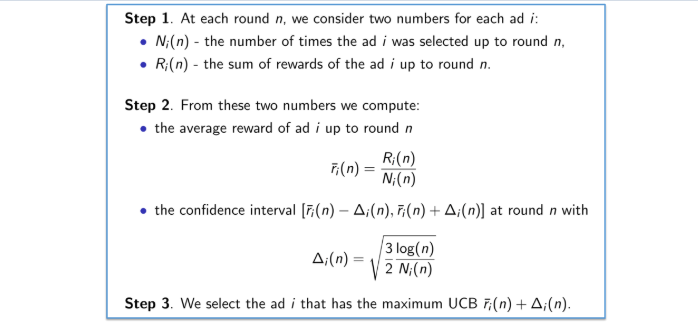

In [9]:
import math
N = 1000
d = 10
ads_selected = []
number_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt((3 / 2) * (math.log(n + 1) / number_of_selections[i]))
            upper_bound = average_reward + delta_i
        else: 
            upper_bound = 1e400  #alternatve to infinity
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + dataset.values[n, ad]
    total_reward = total_reward + reward

### Visualising the results

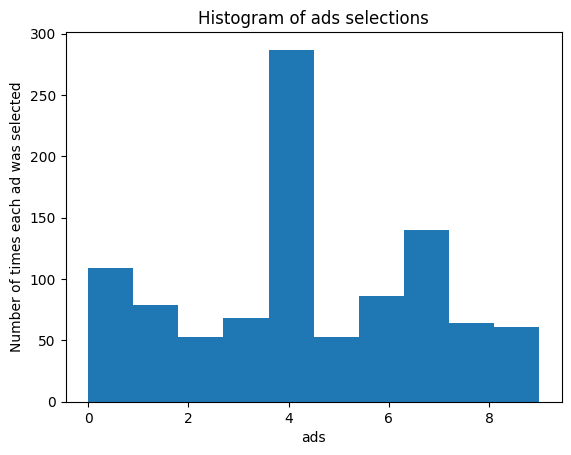

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Thompson Sampling

### Libraries and dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('C:/Users/Acer/Desktop/PythonNotes/Python/DataSetsPython/Ads_CTR_Optimisation.csv')

### Implementing Thompson Sampling

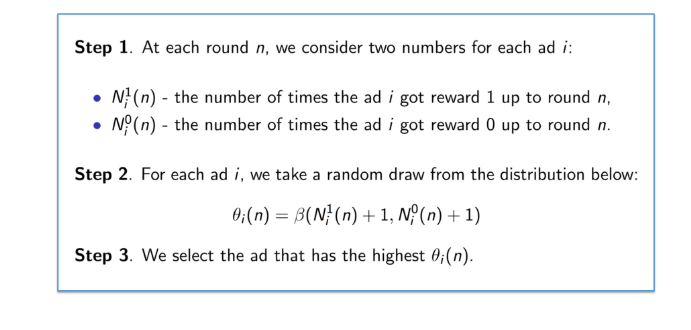

In [48]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

### Visualising the results - Histogram

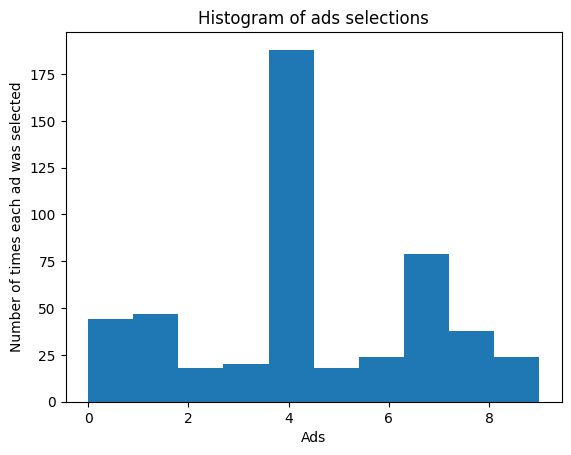

In [49]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()